# GRIP – The Spark Foundation#

**Name - Chinmaya Biswal**

**Data Science and Business Analytics Internship (August 2021)**

**Task 6 - Prediction using Decision Tree Algorithm (Intermediate level task)**

Description Of Task -

Create the Descision Tree classifier and visualize it graphically. The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

**Import all library**

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

**Read and Load data**

In [54]:
data = pd.read_csv("iris.csv", index_col = 0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


**Data Inspection**

In [55]:
data.shape

(150, 5)

In [56]:
data.dtypes

SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [58]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Exploratory data analysis**

Finding missing values

In [59]:
data.isna().sum().sort_values(ascending = False)

Species          0
PetalWidthCm     0
PetalLengthCm    0
SepalWidthCm     0
SepalLengthCm    0
dtype: int64

Finding Outliers

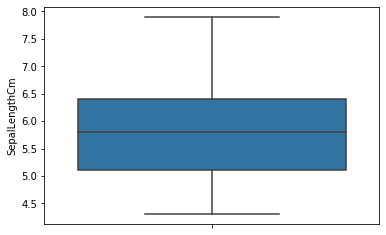

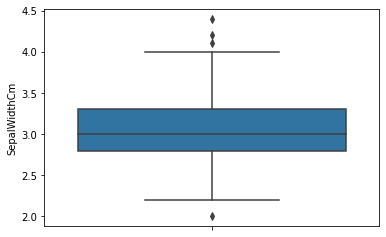

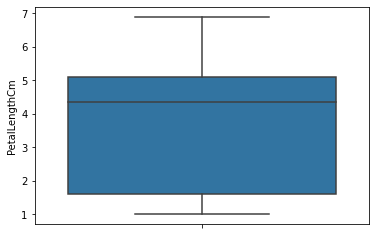

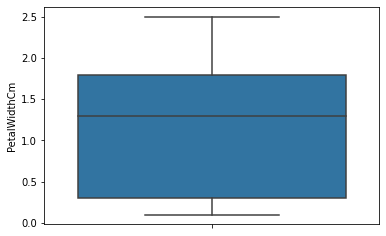

In [60]:
for x in data.columns:
    if data[x].dtypes != 'object':
        sns.boxplot(y = data[x])
        plt.show()

Label Encoding

In [61]:
colname = []
for x in data.columns:
    if data[x].dtypes == 'object':
        colname.append(x)
colname        

['Species']

In [62]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for x in colname:
    data[x] = l.fit_transform(data[x])

**Data Visualization**

In [63]:
data.Species.unique()

array([0, 1, 2])

In [64]:
df_setosa = data.loc[data['Species'] == 0]
df_virginica = data.loc[data['Species'] == 2]
df_versicolor = data.loc[data['Species'] == 1]

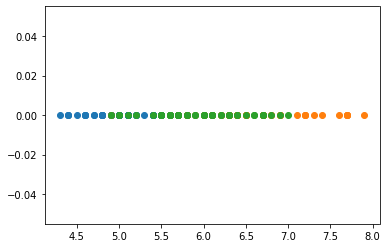

In [65]:
plt.plot(df_setosa['SepalLengthCm'], np.zeros_like(df_setosa['SepalLengthCm']), 'o')
plt.plot(df_virginica['SepalLengthCm'], np.zeros_like(df_virginica['SepalLengthCm']), 'o')
plt.plot(df_versicolor['SepalLengthCm'], np.zeros_like(df_versicolor['SepalLengthCm']), 'o')
plt.show()

Bivariate Analysis

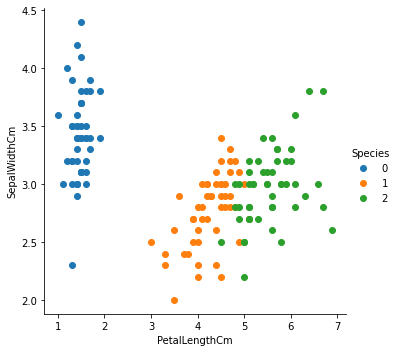

In [66]:
sns.FacetGrid(data, hue = "Species", size = 5).map(plt.scatter, "PetalLengthCm", "SepalWidthCm").add_legend()

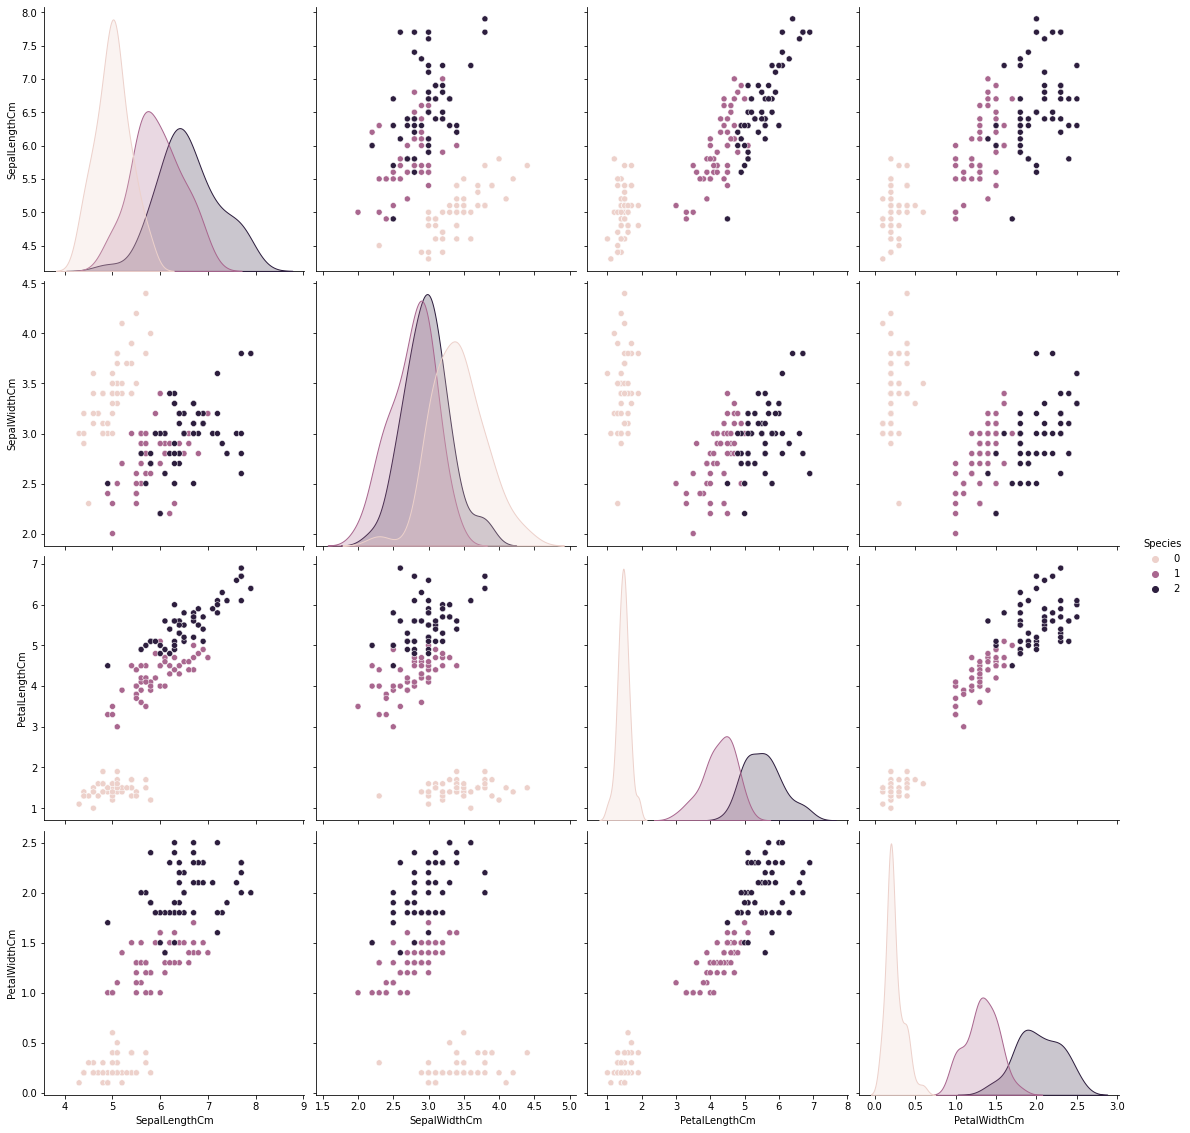

In [67]:
sns.pairplot(data, hue = "Species" , size =4)

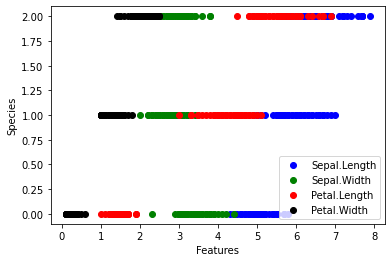

In [68]:
plt.xlabel("Features")
plt.ylabel("Species")

pltX = data.loc[:, "SepalLengthCm"]
pltY = data.loc[:, "Species"]
plt.scatter(pltX, pltY, color = "blue", Label = "Sepal.Length")

pltX = data.loc[:, "SepalWidthCm"]
pltY = data.loc[:, "Species"]
plt.scatter(pltX, pltY, color = "green", Label = "Sepal.Width")

pltX = data.loc[:, "PetalLengthCm"]
pltY = data.loc[:, "Species"]
plt.scatter(pltX, pltY, color = "red", Label = "Petal.Length")

pltX = data.loc[:, "PetalWidthCm"]
pltY = data.loc[:, "Species"]
plt.scatter(pltX, pltY, color = "black", Label = "Petal.Width")

plt.legend()

plt.show()

array([[<AxesSubplot:title={'center':'SepalLengthCm'}>,
        <AxesSubplot:title={'center':'SepalWidthCm'}>],
       [<AxesSubplot:title={'center':'PetalLengthCm'}>,
        <AxesSubplot:title={'center':'PetalWidthCm'}>],
       [<AxesSubplot:title={'center':'Species'}>, <AxesSubplot:>]],
      dtype=object)

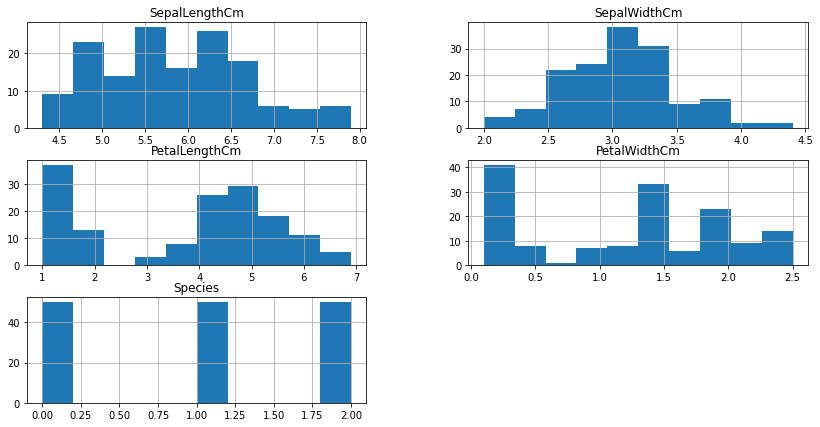

In [69]:
%matplotlib inline
data.hist(figsize=(14,7))

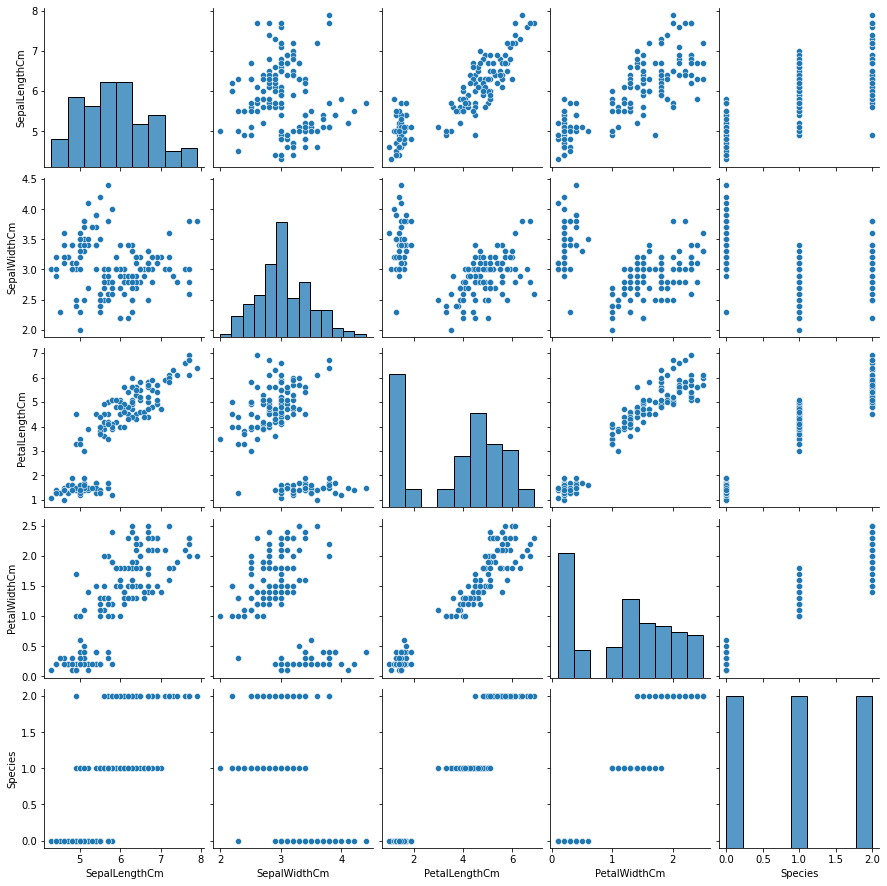

In [19]:
sns.pairplot(data, kind = "scatter")

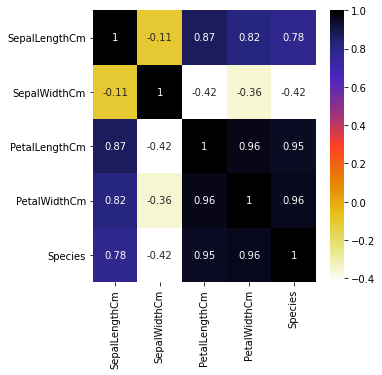

In [70]:
plt.figure(figsize=(5,5))
cor = data.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.CMRmap_r)
plt.show()

**Create X and Y**

In [71]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

**Split data into train and test**

In [72]:
#Split the data into test and train

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,
                                                   random_state = 10)

**Build Model**

In [73]:
#Predicting using the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model_Dt = DecisionTreeClassifier(criterion = "gini", min_samples_leaf = 5,
                                 max_depth = 10,
                                 random_state = 10)
#fit the model on train data
model_Dt.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=10)

In [74]:
Y_pred = model_Dt.predict(X_test)

**Evaluation**

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print(accuracy_score(Y_test, Y_test))
print(classification_report(Y_test, Y_pred))

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.85      0.92        13
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.95      0.93        30
weighted avg       0.95      0.93      0.93        30



In [76]:
print(list(zip(data.columns, model_Dt.feature_importances_)))

[('SepalLengthCm', 0.004659516718598471), ('SepalWidthCm', 0.0), ('PetalLengthCm', 0.42170979526738717), ('PetalWidthCm', 0.5736306880140143)]


**Plot the Model**

In [77]:
from sklearn import tree
from sklearn.tree import plot_tree

[Text(1860.0, 2935.44, 'PetalWidthCm <= 0.8\ngini = 0.665\nsamples = 120\nvalue = [40, 37, 43]'),
 Text(1240.0, 2283.12, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(2480.0, 2283.12, 'PetalLengthCm <= 4.75\ngini = 0.497\nsamples = 80\nvalue = [0, 37, 43]'),
 Text(1240.0, 1630.8000000000002, 'SepalLengthCm <= 5.3\ngini = 0.057\nsamples = 34\nvalue = [0, 33, 1]'),
 Text(620.0, 978.48, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(1860.0, 978.48, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(3720.0, 1630.8000000000002, 'PetalWidthCm <= 1.75\ngini = 0.159\nsamples = 46\nvalue = [0, 4, 42]'),
 Text(3100.0, 978.48, 'gini = 0.49\nsamples = 7\nvalue = [0, 3, 4]'),
 Text(4340.0, 978.48, 'PetalLengthCm <= 4.95\ngini = 0.05\nsamples = 39\nvalue = [0, 1, 38]'),
 Text(3720.0, 326.1600000000003, 'gini = 0.32\nsamples = 5\nvalue = [0, 1, 4]'),
 Text(4960.0, 326.1600000000003, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

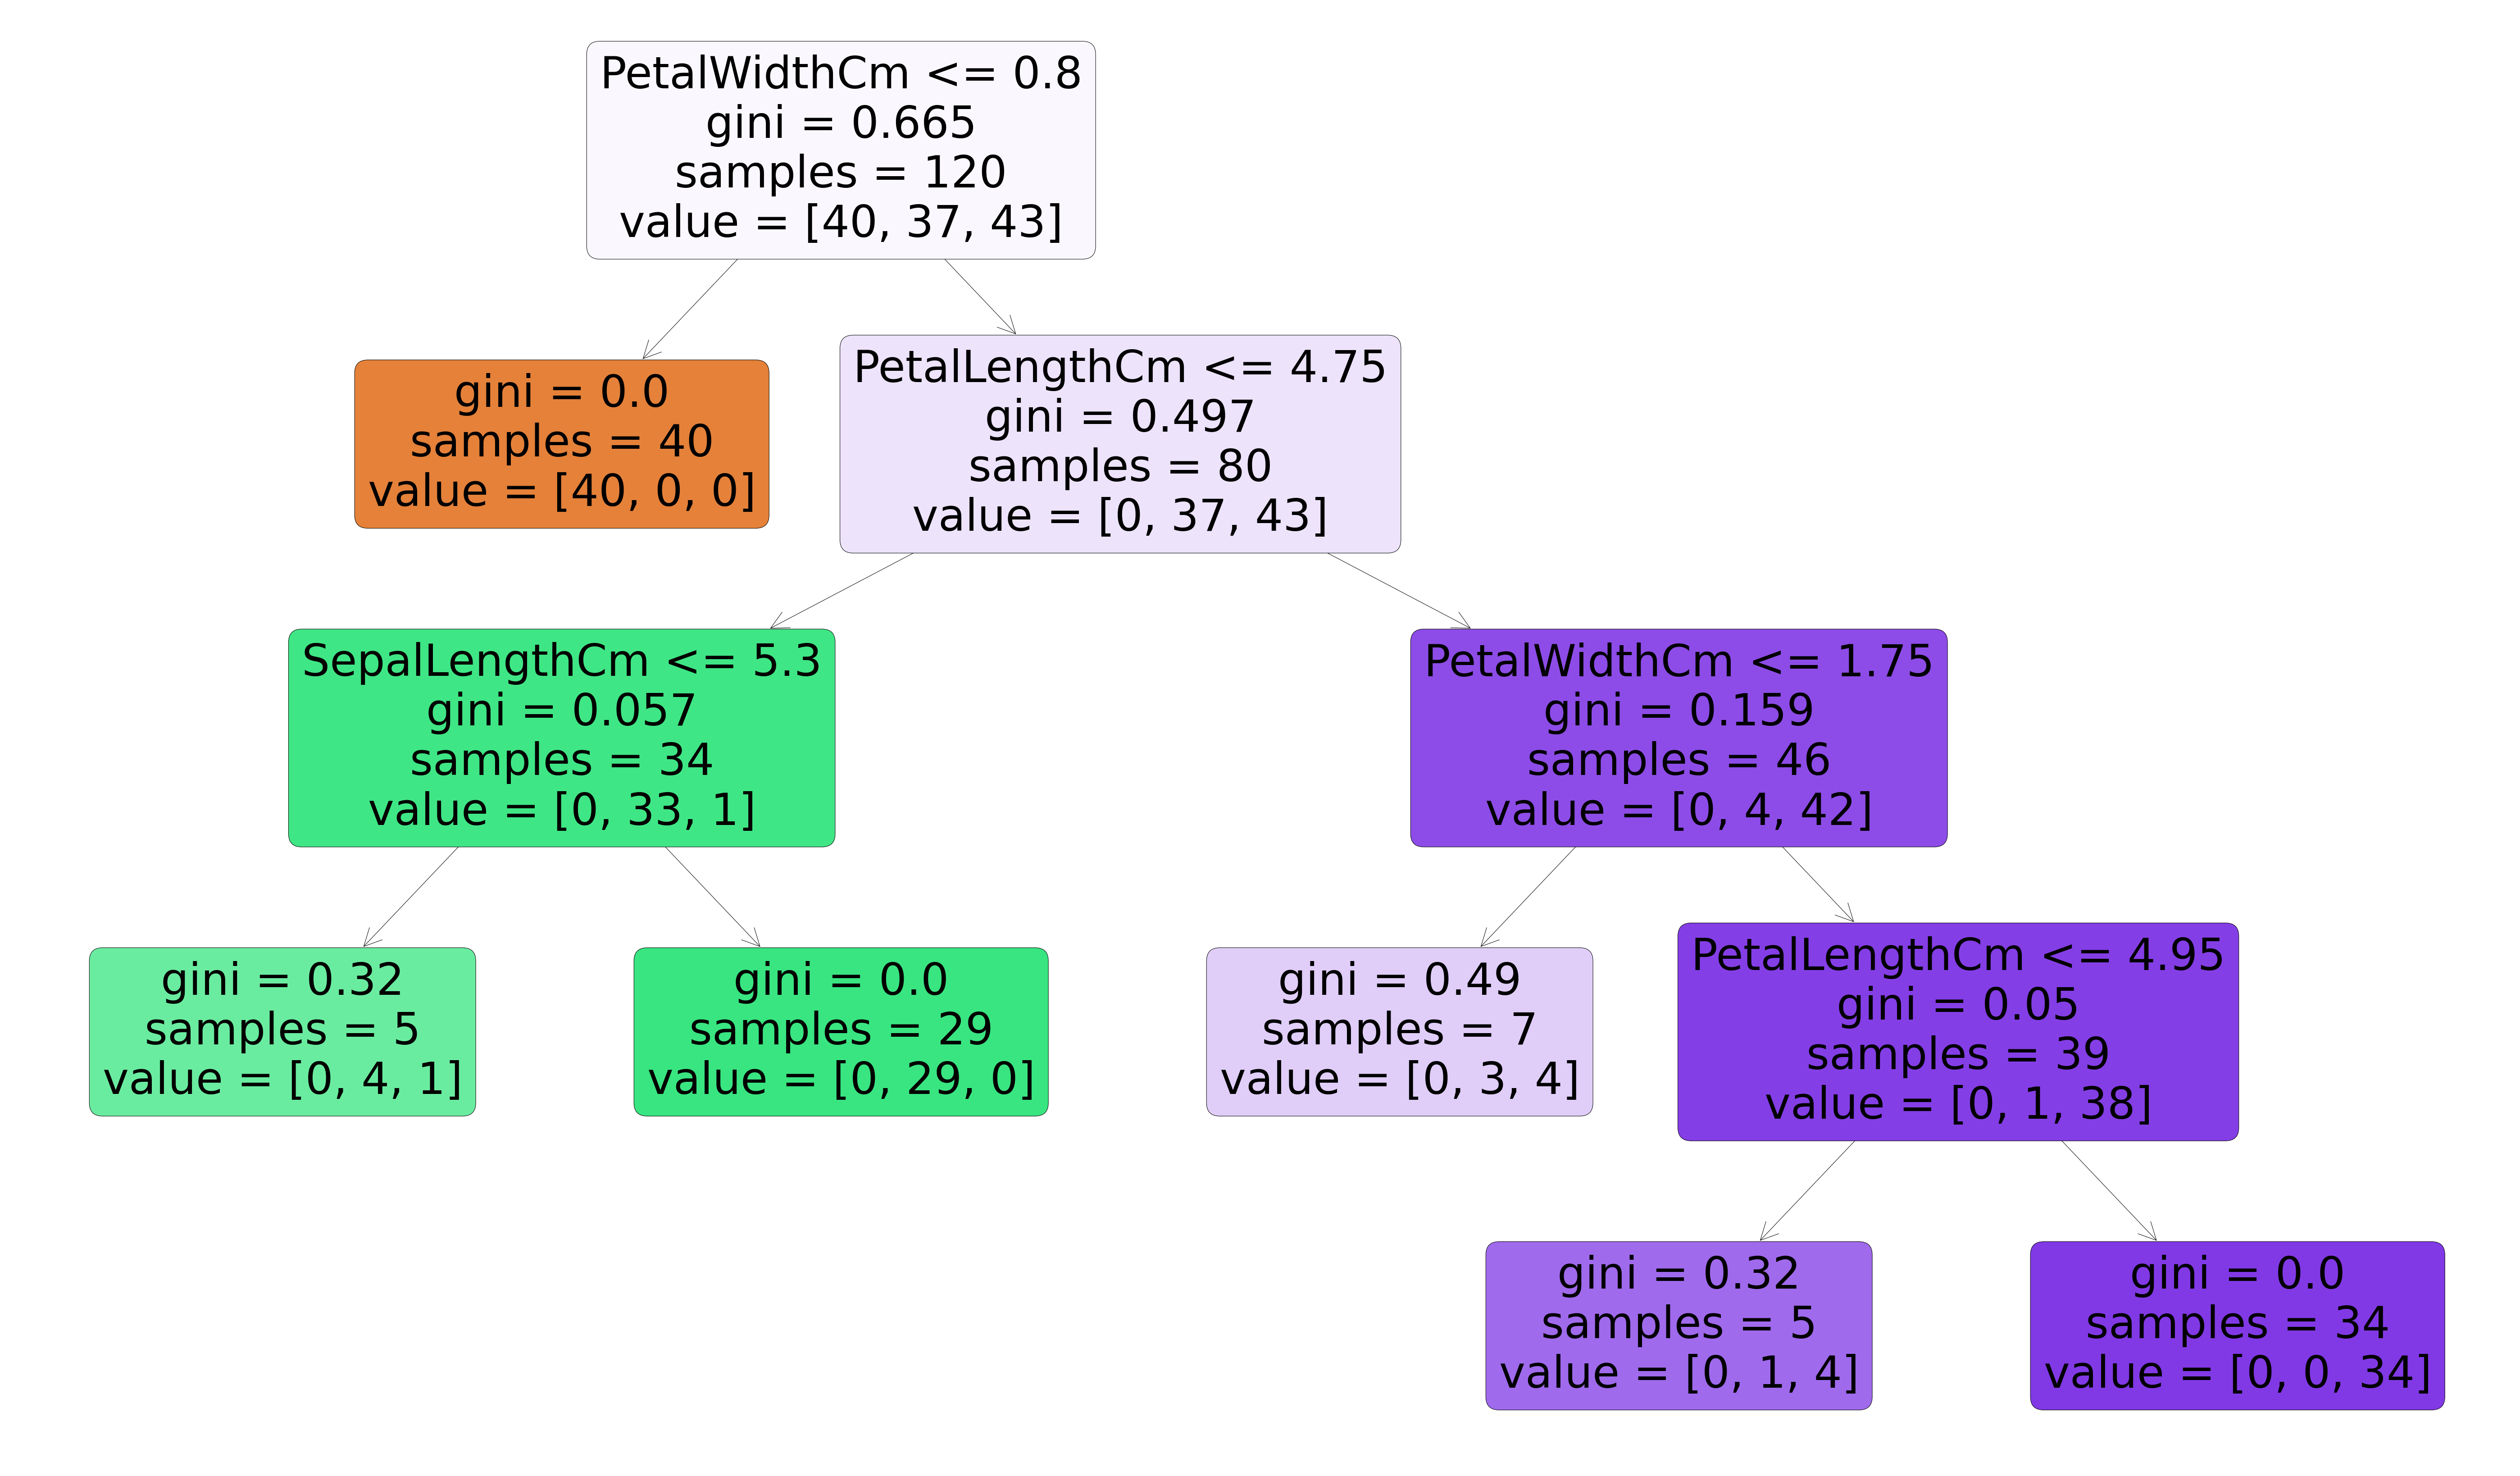

In [34]:
plt.figure(figsize=(100,60))
plot_tree(model_Dt, filled = True, 
         feature_names = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
         rounded = True)

**Prediction on New Data**

In [78]:
sl = float(input("Enter Sepal Length:-"))
sw = float(input("Enter Sepal Width:-"))
pl = float(input("Enter Petal Length:-"))
pw = float(input("Enter Petal Width:-"))
sp = model_Dt.predict([[sl, sw, pl, pw]])
if sp==0:
    print("Predict Species is Setosa")
elif sp==1:
    print("Predict Species is Versicolor")
elif sp==2:
    print("Predict Species is Virginica")
else:
    print("Enter Invalid Input")    

Enter Sepal Length:-2.4
Enter Sepal Width:-0.4
Enter Petal Length:-1.8
Enter Petal Width:-1.2
Predict Species is Versicolor


**Thank You**